In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [215]:
data=pd.read_csv('data/health_data.csv')

In [216]:
data.head()

BIO_SEX        age  TREG1  ALCEVR1  ALCPROBS1  marever1  cocever1  \
0      2.0        NaN    0.0      1.0          2         1         0   
1      2.0  19.427397    1.0      1.0          1         0         0   
2      1.0        NaN    0.0      0.0          0         0         0   
3      1.0  20.430137    1.0      0.0          0         1         1   
4      2.0        NaN    0.0      1.0          0         0         0   

   inhever1  cigavail  DEP1  ESTEEM1  VIOL1  PASSIST  DEVIANT1  SCHCONN1  \
0         0       0.0  10.0     47.0    4.0        0       5.0       NaN   
1         0       1.0  17.0     35.0    1.0        0       5.0      22.0   
2         0       0.0   2.0     45.0    0.0        0       1.0      30.0   
3         1       1.0  19.0     47.0    4.0        1       4.0      19.0   
4         0       0.0   6.0     39.0    0.0        0       5.0      32.0   

       GPA1  EXPEL1  FAMCONCT  PARACTV  PARPRES  
0       NaN     0.0      24.3      8.0     15.0  
1  2.333333     0.0      23.3      9.0     15.0  
2  2.250000     0.0      24.3      3.0     15.0  
3  2.000000     0.0      18.7      6.0     14.0  
4  3.000000     0.0      20.0      9.0      6.0

In [217]:
data=data.fillna(np.mean(data))

In [218]:
data.head()

BIO_SEX        age  TREG1  ALCEVR1  ALCPROBS1  marever1  cocever1  \
0      2.0  16.541548    0.0      1.0          2         1         0   
1      2.0  19.427397    1.0      1.0          1         0         0   
2      1.0  16.541548    0.0      0.0          0         0         0   
3      1.0  20.430137    1.0      0.0          0         1         1   
4      2.0  16.541548    0.0      1.0          0         0         0   

   inhever1  cigavail  DEP1  ESTEEM1  VIOL1  PASSIST  DEVIANT1   SCHCONN1  \
0         0       0.0  10.0     47.0    4.0        0       5.0  28.275597   
1         0       1.0  17.0     35.0    1.0        0       5.0  22.000000   
2         0       0.0   2.0     45.0    0.0        0       1.0  30.000000   
3         1       1.0  19.0     47.0    4.0        1       4.0  19.000000   
4         0       0.0   6.0     39.0    0.0        0       5.0  32.000000   

       GPA1  EXPEL1  FAMCONCT  PARACTV  PARPRES  
0  2.802080     0.0      24.3      8.0     15.0  
1  2.333333     0.0      23.3      9.0     15.0  
2  2.250000     0.0      24.3      3.0     15.0  
3  2.000000     0.0      18.7      6.0     14.0  
4  3.000000     0.0      20.0      9.0      6.0

In [219]:
data.columns

Index(['BIO_SEX', 'age', 'TREG1', 'ALCEVR1', 'ALCPROBS1', 'marever1',
       'cocever1', 'inhever1', 'cigavail', 'DEP1', 'ESTEEM1', 'VIOL1',
       'PASSIST', 'DEVIANT1', 'SCHCONN1', 'GPA1', 'EXPEL1', 'FAMCONCT',
       'PARACTV', 'PARPRES'],
      dtype='object')

In [220]:
features=[ 'ALCEVR1', 'ALCPROBS1', 'marever1','DEP1', 'ESTEEM1', 'VIOL1','DEVIANT1', 'SCHCONN1', 'FAMCONCT','PARACTV', 'PARPRES']

In [221]:
cluster=data[features]

In [222]:
data.head()

BIO_SEX        age  TREG1  ALCEVR1  ALCPROBS1  marever1  cocever1  \
0      2.0  16.541548    0.0      1.0          2         1         0   
1      2.0  19.427397    1.0      1.0          1         0         0   
2      1.0  16.541548    0.0      0.0          0         0         0   
3      1.0  20.430137    1.0      0.0          0         1         1   
4      2.0  16.541548    0.0      1.0          0         0         0   

   inhever1  cigavail  DEP1  ESTEEM1  VIOL1  PASSIST  DEVIANT1   SCHCONN1  \
0         0       0.0  10.0     47.0    4.0        0       5.0  28.275597   
1         0       1.0  17.0     35.0    1.0        0       5.0  22.000000   
2         0       0.0   2.0     45.0    0.0        0       1.0  30.000000   
3         1       1.0  19.0     47.0    4.0        1       4.0  19.000000   
4         0       0.0   6.0     39.0    0.0        0       5.0  32.000000   

       GPA1  EXPEL1  FAMCONCT  PARACTV  PARPRES  
0  2.802080     0.0      24.3      8.0     15.0  
1  2.333333     0.0      23.3      9.0     15.0  
2  2.250000     0.0      24.3      3.0     15.0  
3  2.000000     0.0      18.7      6.0     14.0  
4  3.000000     0.0      20.0      9.0      6.0

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BIO_SEX    6504 non-null   float64
 1   age        6504 non-null   float64
 2   TREG1      6504 non-null   float64
 3   ALCEVR1    6504 non-null   float64
 4   ALCPROBS1  6504 non-null   int64  
 5   marever1   6504 non-null   int64  
 6   cocever1   6504 non-null   int64  
 7   inhever1   6504 non-null   int64  
 8   cigavail   6504 non-null   float64
 9   DEP1       6504 non-null   float64
 10  ESTEEM1    6504 non-null   float64
 11  VIOL1      6504 non-null   float64
 12  PASSIST    6504 non-null   int64  
 13  DEVIANT1   6504 non-null   float64
 14  SCHCONN1   6504 non-null   float64
 15  GPA1       6504 non-null   float64
 16  EXPEL1     6504 non-null   float64
 17  FAMCONCT   6504 non-null   float64
 18  PARACTV    6504 non-null   float64
 19  PARPRES    6504 non-null   float64
dtypes: float

In [224]:
cluster.columns=map(str.upper,cluster.columns)

In [225]:
cluster.head()

ALCEVR1  ALCPROBS1  MAREVER1  DEP1  ESTEEM1  VIOL1  DEVIANT1   SCHCONN1  \
0      1.0          2         1  10.0     47.0    4.0       5.0  28.275597   
1      1.0          1         0  17.0     35.0    1.0       5.0  22.000000   
2      0.0          0         0   2.0     45.0    0.0       1.0  30.000000   
3      0.0          0         1  19.0     47.0    4.0       4.0  19.000000   
4      1.0          0         0   6.0     39.0    0.0       5.0  32.000000   

   FAMCONCT  PARACTV  PARPRES  
0      24.3      8.0     15.0  
1      23.3      9.0     15.0  
2      24.3      3.0     15.0  
3      18.7      6.0     14.0  
4      20.0      9.0      6.0

In [226]:
cluster_s=cluster.copy()

In [227]:
for feature in cluster.columns:
    cluster_s[feature]=scale(cluster_s[feature].astype('float64'))
    


In [228]:
cluster_s.head()

ALCEVR1  ALCPROBS1  MAREVER1      DEP1   ESTEEM1     VIOL1  DEVIANT1  \
0  0.904243   1.680467  1.617202  0.181777  1.140602  0.928002  0.643539   
1  0.904243   0.627808 -0.618352  1.214697 -1.075041 -0.232120  0.643539   
2 -1.116194  -0.424851 -0.618352 -0.998704  0.771328 -0.618828 -0.497934   
3 -1.116194  -0.424851  1.617202  1.509817  1.140602  0.928002  0.358171   
4  0.904243  -0.424851 -0.618352 -0.408463 -0.336493 -0.618828  0.643539   

       SCHCONN1  FAMCONCT   PARACTV   PARPRES  
0 -1.385259e-15  0.626122  0.561081  0.770944  
1 -1.223477e+00  0.333122  0.858570  0.770944  
2  3.361860e-01  0.626122 -0.926362  0.770944  
3 -1.808350e+00 -1.014681 -0.033896  0.301971  
4  7.261017e-01 -0.633781  0.858570 -3.449807

In [229]:
cluster_train,cluster_test=train_test_split(cluster_s,test_size=0.3,random_state=222)

In [230]:
cluster_train.shape

(4552, 11)

In [231]:
cluster_test.shape

(1952, 11)

In [232]:
## Applying KMeans clustring


In [234]:
clusters=range(1,11)
mean_distance=[]

In [235]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cluster_train)
    ## Now for the euclidean distance 
    mean_distance.append(sum(np.min(cdist(cluster_train,model.cluster_centers_,'euclidean'),axis=1))/cluster_train.shape[0])
    

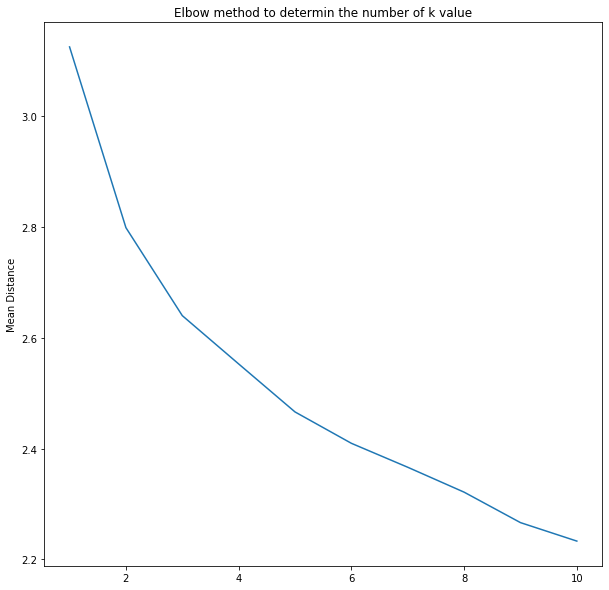

In [236]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11),mean_distance)
plt.ylabel('Mean Distance')
plt.title('Elbow method to determin the number of k value')
plt.show()

In [237]:
model1=KMeans(n_clusters=3)

In [238]:
model1.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## canonical discriminate analysis
hence we will use PCA

In [239]:
model1.cluster_centers_ ## It is 11 dimentional data 

array([[ 0.65709543,  1.03699546,  1.03939717,  0.88576837, -0.64449034,
         0.87112753,  1.18593584, -0.87383744, -0.86325271, -0.4255888 ,
        -0.43725099],
       [-1.11441805, -0.42485078, -0.52228841, -0.27154955,  0.19496951,
        -0.2925163 , -0.45558369,  0.32232609,  0.27708616,  0.07002044,
         0.13262918],
       [ 0.89195123, -0.05903317, -0.01321981, -0.19077979,  0.1383347 ,
        -0.17173627, -0.12441821,  0.14303904,  0.18319251,  0.1419845 ,
         0.09400973]])

In [240]:
pca_2=PCA(2)

In [241]:
plot_column=pca_2.fit_transform(cluster_train)

Text(0.5, 1.0, 'Scatter plot for 3 cluster solution using to canonical var')

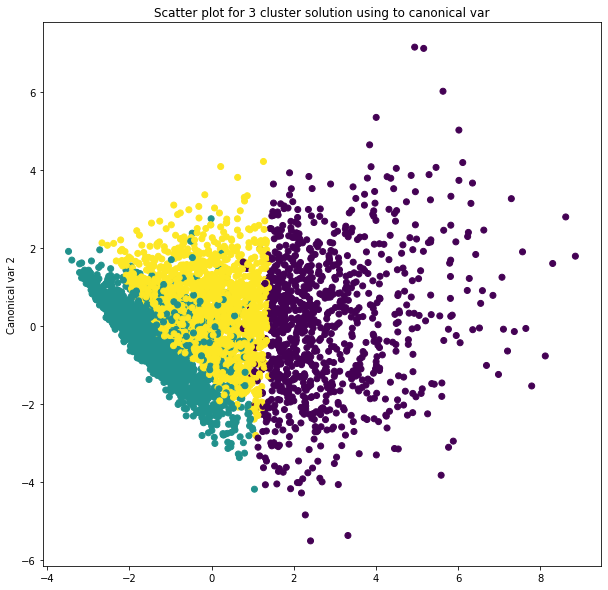

In [244]:
plt.figure(figsize=(10,10))
plt.scatter(plot_column[:,0],plot_column[:,1],c=model1.labels_)
# plt.xlabel("Canonical var 1")
plt.ylabel('Canonical var 2')
plt.title('Scatter plot for 3 cluster solution using to canonical var')

array([[-1.83154374,  0.064131  ],
       [-0.46030326, -1.19099733],
       [ 0.04162117,  0.91867962],
       ...,
       [ 0.82040342, -1.53288398],
       [-0.8712163 ,  0.3581232 ],
       [ 5.69584512, -3.60678629]])

In [249]:
model2=KMeans(n_clusters=2)
model2.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Scatter plot for 3 cluster solution using to canonical var')

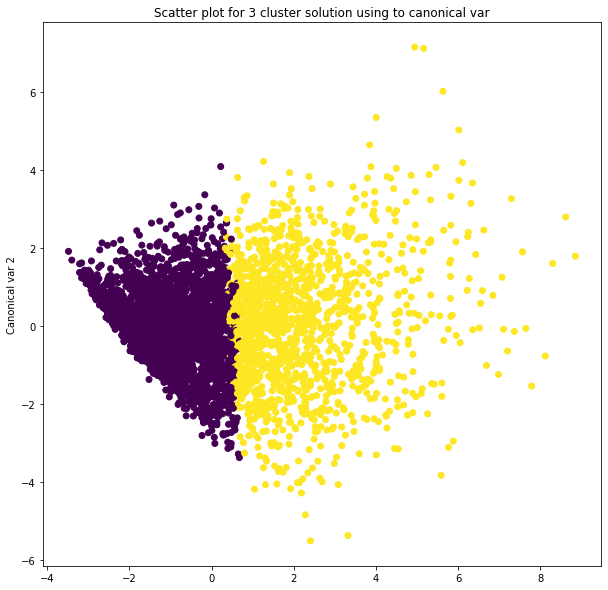

In [250]:
plot_column=pca_2.fit_transform(cluster_train)
plt.figure(figsize=(10,10))
plt.scatter(plot_column[:,0],plot_column[:,1],c=model2.labels_)
# plt.xlabel("Canonical var 1")
plt.ylabel('Canonical var 2')
plt.title('Scatter plot for 3 cluster solution using to canonical var')

In [251]:
predication=model.predict(cluster_test)